In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D

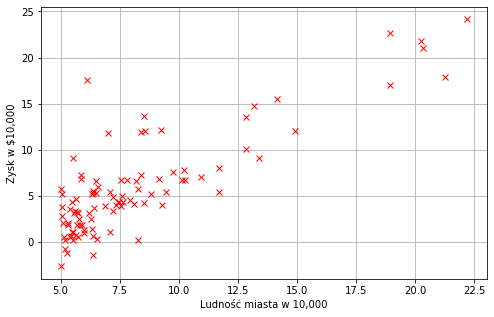

In [10]:
#Powtórka z week 1

data = pd.read_csv('ex1data1.txt', header=None)  # Wczytywanie danych z pliku
x = data[0].values
y = data[1].values
n = x.shape[0]
x = x.reshape(n, 1) # wektory o wymiarach (n, ) zamieniam na macierz (n, 1)
y = y.reshape(n, 1)

plt.figure(figsize=(8, 5))  # Wizualizacja danych
plt.plot(x, y, 'rx')
plt.ylabel('Zysk w $10,000')
plt.xlabel('Ludność miasta w 10,000')
plt.grid()

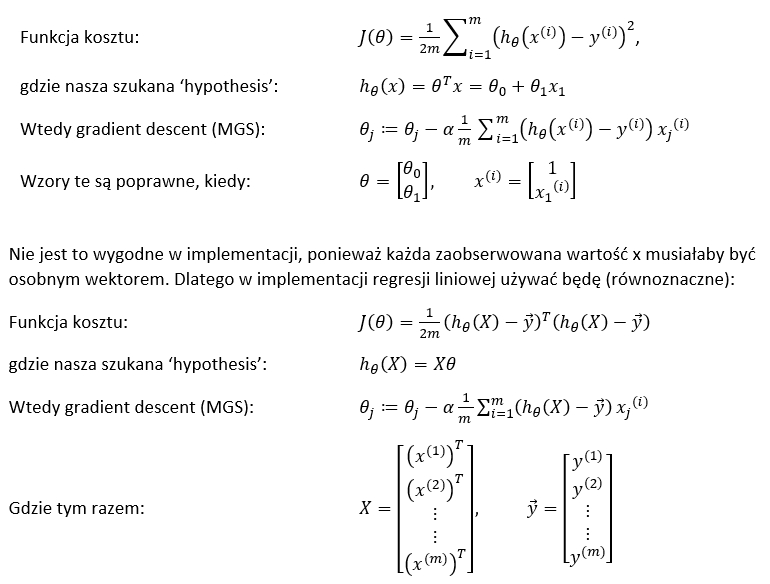

In [11]:
Image(filename='wzory.jpg')

In [12]:
# Obliczanie kosztu
J = lambda  x, y, theta: 1/(2*y.shape[0]) * np.sum((x @ theta - y)**2) 

# Metoda gradientu prostego
def grad_des(x, y, init_theta, alpha, it): 
    m = y.shape[0]
    n = init_theta.shape[0]
    Js = [J(x, y, init_theta)]
    theta = init_theta.copy()   # Nie chcemy, aby theta początkowe ulegało zmianie
    for i in range(it):
        h = x @ theta
        for j in range(n):
            theta[j] -= alpha/m * np.sum((h - y) * x[:, [j]])
        Js.append(J(x, y, theta))
    return theta, Js

Text(0, 0.5, 'Wartości funkcji kosztu J$(\\Theta)$')

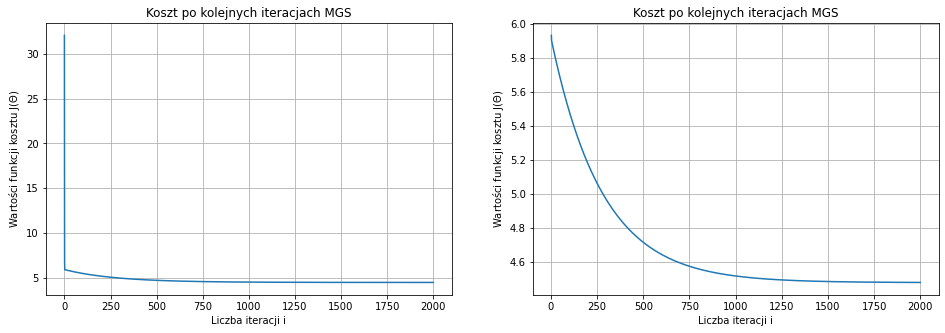

In [13]:
x = np.concatenate((np.ones(shape=(n, 1)), x), axis=1) # łączymy z jedynkami
init_theta = np.zeros(shape=(2, 1))
iterations = 2000

theta, Js = grad_des(x, y, init_theta, alpha=0.01, it=iterations)

#Sprawdzamy przebieg funkcji kosztu
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.plot(range(iterations + 1), Js)
plt.grid()
plt.title("Koszt po kolejnych iteracjach MGS")
plt.xlabel("Liczba iteracji i")
plt.ylabel("Wartości funkcji kosztu J$(\Theta)$")

plt.subplot(122)
plt.plot(range(2, iterations + 1), Js[2:])
plt.grid()
plt.title("Koszt po kolejnych iteracjach MGS")
plt.xlabel("Liczba iteracji i")
plt.ylabel("Wartości funkcji kosztu J$(\Theta)$")

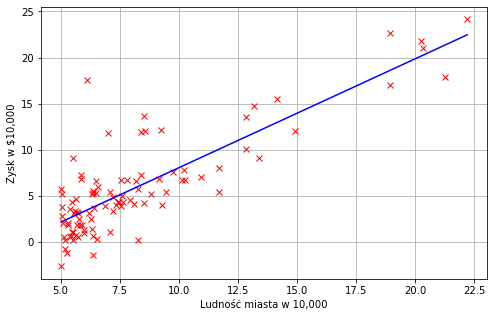

In [14]:
reg1 = lambda x: theta[0] + theta[1] * x 
domain = [min(x[:, 1]), max(x[:, 1])]

plt.figure(figsize=(8, 5))  # Sprawdzamy dopasowanie 'hypothesis'
plt.plot(x[:, 1], y, 'rx', domain, reg1(domain), 'b')
plt.ylabel('Zysk w $10,000')
plt.xlabel('Ludność miasta w 10,000')
plt.grid()

In [15]:
population = 17.5
pop_arr = np.array([[1], [population]])
predicted_profit = theta.T @ pop_arr
print("Przewidywany zysk miasta o ludności {} mieszkańców:\n{} $".format(int(population*1e4), int(predicted_profit*1e4)))

Przewidywany zysk miasta o ludności 175000 mieszkańców:
169006 $


In [16]:
#RL z wieloma parametrami

data = pd.read_csv('ex1data2.txt', header=None)
data.columns = ['powierzchnia', 'liczba pokoi', 'cena']
data.head()

,powierzchnia,liczba pokoi,cena
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


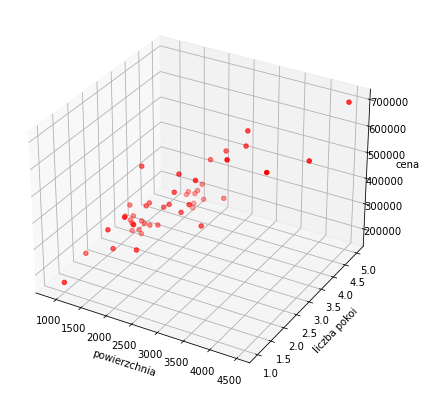

In [17]:
x1 = data['powierzchnia'].values
x2 = data['liczba pokoi'].values
y = data['cena'].values
n = x1.shape[0]
x1 = x1.reshape(n, 1)
x2 = x2.reshape(n, 1)
y = y.reshape(n, 1)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='r', marker='o')

ax.set_xlabel('powierzchnia')
ax.set_ylabel('liczba pokoi')
ax.set_zlabel('cena')
plt.show()

In [18]:
x1_mean = np.mean(x1)   # Normalizacja danych
x1_std = np.std(x1)
x1_nrm = (x1 - x1_mean) / x1_std
X_nrm = np.concatenate((np.ones((n, 1)), x1_nrm, x2),  axis=1)
y = y / 1e5
X = np.concatenate((np.ones((n, 1)), x1, x2),  axis=1) # Brak normalizacji - dla porównania

<ipython-input-12-f8c37261a644>:2: RuntimeWarning: overflow encountered in square
  J = lambda  x, y, theta: 1/(2*y.shape[0]) * np.sum((x @ theta - y)**2)
<ipython-input-12-f8c37261a644>:13: RuntimeWarning: overflow encountered in multiply
  theta[j] -= alpha/m * np.sum((h - y) * x[:, [j]])
<ipython-input-12-f8c37261a644>:13: RuntimeWarning: invalid value encountered in subtract
  theta[j] -= alpha/m * np.sum((h - y) * x[:, [j]])


Text(0, 0.5, 'Wartości funkcji kosztu J$(\\Theta)$')

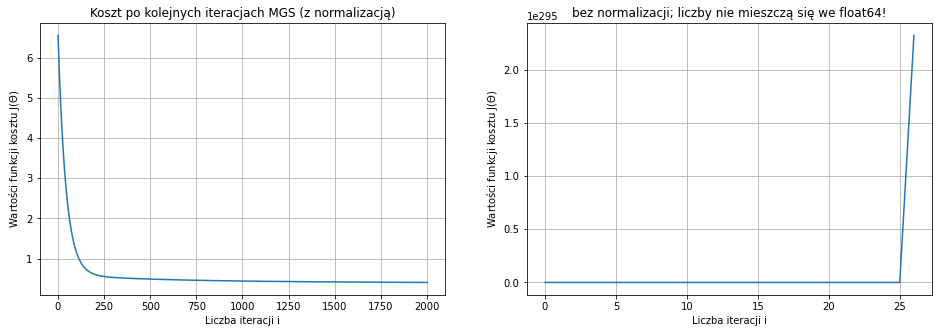

In [27]:
init_theta = np.zeros(shape=(3, 1))
iterations = 2000

theta_nrm, Js_nrm = grad_des(X_nrm, y, init_theta, alpha=0.1, it=iterations)
theta, Js = grad_des(X, y, init_theta, alpha=0.1, it=iterations)

#Sprawdzamy przebieg funkcji kosztu
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.plot(range(iterations + 1), Js_nrm)
plt.grid()
plt.title("Koszt po kolejnych iteracjach MGS (z normalizacją)")
plt.xlabel("Liczba iteracji i")
plt.ylabel("Wartości funkcji kosztu J$(\Theta)$")

plt.subplot(122)
plt.plot(range(iterations + 1), Js)
plt.grid()
plt.title("bez normalizacji; liczby nie mieszczą się we float64!")
plt.xlabel("Liczba iteracji i")
plt.ylabel("Wartości funkcji kosztu J$(\Theta)$")

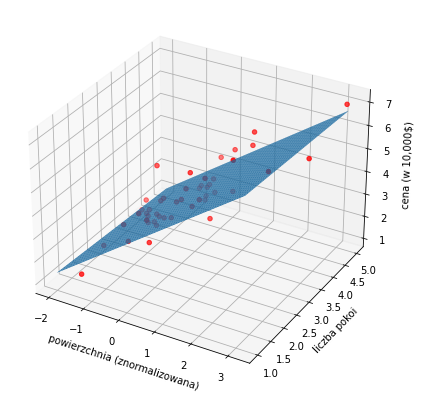

In [20]:
reg2 = lambda x1, x2: theta_nrm[0] + theta_nrm[1]*x1 + theta_nrm[2]*x2

x1 = X_nrm[:, 1]
x2 = X_nrm[:, 2]
domain_x1 = np.linspace(-2, 3.2, 100)
domain_x2 = np.linspace(1, 5, 100)
domain_x1, domain_x2 = np.meshgrid(domain_x1, domain_x2)

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(domain_x1, domain_x2, reg2(domain_x1, domain_x2))
ax.scatter(x1, x2, y, c='r', marker='o')

ax.set_xlabel('powierzchnia (znormalizowana)')
ax.set_ylabel('liczba pokoi')
ax.set_zlabel('cena (w 10,000$)')
plt.show()

In [23]:
size = 2500
rooms = 5
flat_features = np.array([[1], [(size - x1_mean) / x1_std], [rooms]])
predicted_cost = (theta_nrm.T @ flat_features) * 1e5
print("Przewidywany koszt mieszkania z {} pokojami o powierzchni {} stóp kwadratowych: \n{} $".format(rooms, size, int(predicted_cost)))

Przewidywany koszt mieszkania z 5 pokojami o powierzchni 2500 stóp kwadratowych: 
394116 $


In [14]:
# Posprawdzać różne alfy

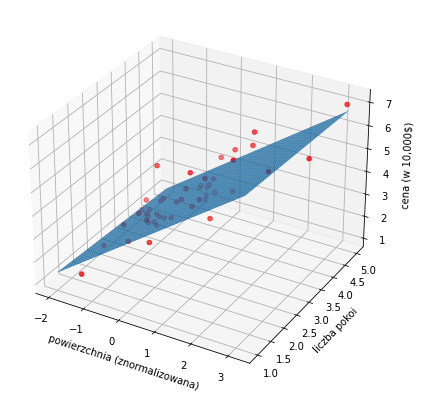

In [15]:
# Normal equation
theta_ne = np.linalg.inv(X_nrm.T @ X_nrm) @ X_nrm.T @ y
reg3 = lambda x1, x2: theta_ne[0] + theta_ne[1]*x1 + theta_ne[2]*x2

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='r', marker='o')
ax.plot_surface(domain_x1, domain_x2, reg3(domain_x1, domain_x2))

ax.set_xlabel('powierzchnia (znormalizowana)')
ax.set_ylabel('liczba pokoi')
ax.set_zlabel('cena (w 10,000$)')
plt.show()